In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('dataset.csv')

In [4]:
df

,Time_Segment,Holiday,Week_day,Vacation_week,Weekend Return,TM,Season,PPT,VVM10,Exceeds Threshold
0,2-6,No,Friday,1,No,Low,Winter,Low,Medium,0
1,6-10,No,Friday,1,No,Low,Winter,Low,Medium,0
2,10-14,No,Friday,1,No,Low,Winter,Low,Medium,1
3,14-18,No,Friday,1,No,Low,Winter,Low,Medium,0
4,18-22,No,Friday,1,No,Low,Winter,Low,Medium,1
...,...,...,...,...,...,...,...,...,...,...
4375,6-10,Yes,Saturday,1,No,Medium,Winter,None,Medium,0
4376,10-14,Yes,Saturday,1,No,Medium,Winter,None,Medium,1
4377,14-18,Yes,Saturday,1,No,Medium,Winter,None,Medium,1
4378,18-22,Yes,Saturday,1,No,Medium,Winter,None,Medium,1


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=[ 'Time_Segment', 'Season', 'Week_day', 'Vacation_week'])
    df = df.astype(float)

    return df

def xgboost_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Weekend Return', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=400, subsample=0.9)
    model.fit(X_train, y_train)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Assuming your model is named 'model' and is already trained
    xgb.plot_importance(model)
    plt.title("XGBoost Feature Importance")
    plt.show()
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    xgb.plot_importance(model)
    plt.show()
    

def main():
    xgboost_model()

Accuracy: 0.8158295281582952


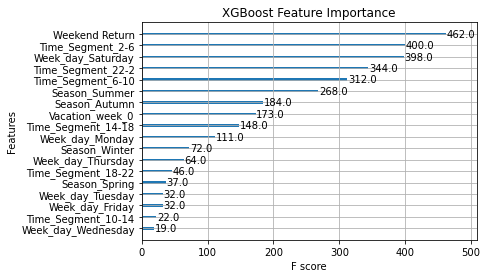

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       326
         1.0       0.78      0.88      0.83       331

    accuracy                           0.82       657
   macro avg       0.82      0.82      0.81       657
weighted avg       0.82      0.82      0.81       657

Confusion Matrix:
[[244  82]
 [ 39 292]]


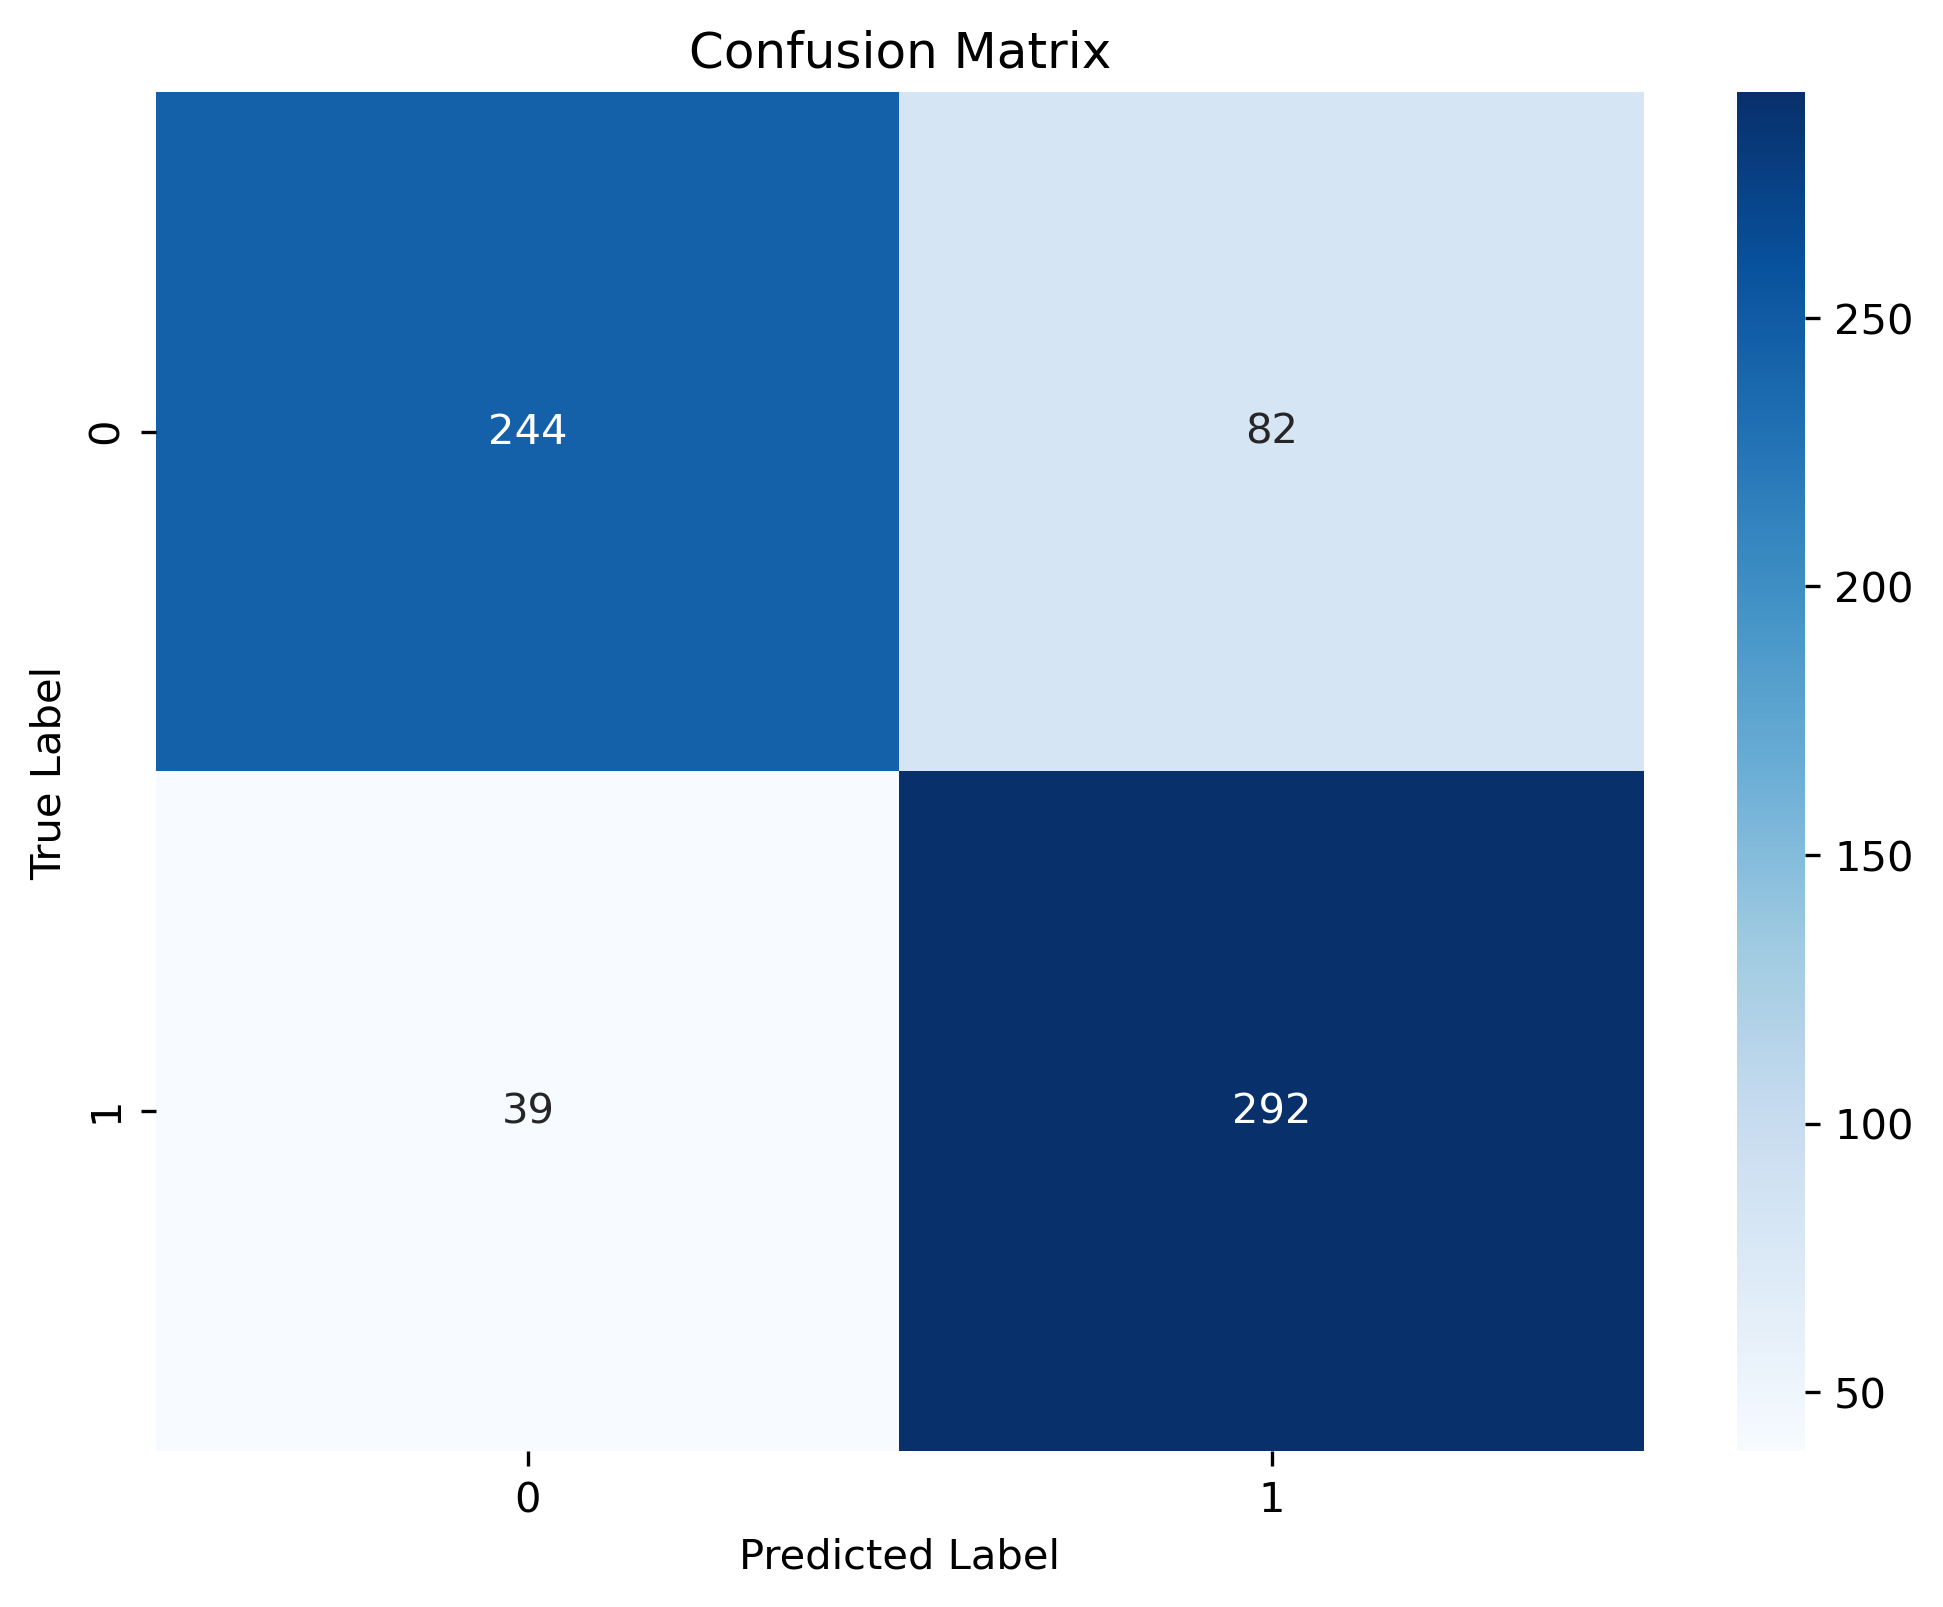

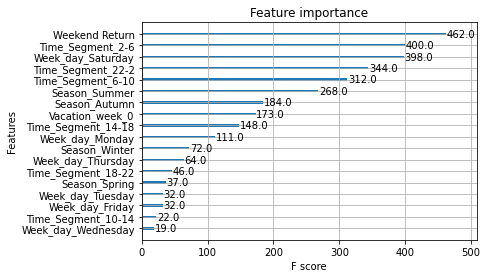

In [10]:
main()